In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np


### VERİYİ TANIMA 

In [25]:
data= pd.read_csv(r'C:\Users\beyza\Downloads\Restaurant_revenue.csv')
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


- DataFrame sınıfına ait bir nesne 
- 1000 satır gözlem içerir . index 0 ile 999 arasındadır ( RangeIndex: 1000 entries , 0 to 999 )
- 8 sütun içerir.

Restoran Geliri Tahmini Veri Kümesi, bir dizi hayali restoran için aylık gelirin tahmin edilmesine odaklanan, tahmine dayalı modelleme çalışmaları için hazırlanmış simüle edilmiş bir veri kümesidir. Bu veri seti, restoran performansını etkileyen faktörleri taklit etmek için tasarlanmış çok çeşitli özellikler sunar.

**Veri Kümesi Özellikleri:**

1. *Number_of_Customers (Müşteri Sayısı)*

- &nbsp; Restoranı ziyaret eden müşterilerin sayısını belirtir.
- &nbsp; Yüksek müşteri sayısı genellikle daha yüksek gelirle ilişkilidir. Müşteri sayısı, restoranın popülaritesini ve müşteri tabanının genişliğini gösterir.

2. *Menu_Price (Menü Fiyatı)*

- &nbsp; Restorandaki ortalama menü fiyatlarını gösterir.
- &nbsp; Menü fiyatları, gelir tahmininde önemli bir faktördür. Yüksek fiyatlar daha yüksek gelir sağlayabilir, ancak müşteri sayısını da etkileyebilir.

3. *Marketing_Spend (Pazarlama Harcaması)*

- &nbsp; Pazarlama faaliyetlerine ilişkin harcamaları belirtir.
- &nbsp; Pazarlama harcamaları, müşteri çekme ve gelir artırma stratejilerinde kritik bir rol oynar. Daha yüksek pazarlama harcamaları genellikle daha fazla müşteri çekebilir.

4. *Cuisine_Type (Mutfak Türü)*

- &nbsp; Restoranın sunduğu mutfağın türünü belirtir (örneğin, İtalyan, Meksika, Japon, Amerikan).
- &nbsp; Mutfak türü, belirli müşteri segmentlerini çekebilir ve restoranın popülaritesini etkileyebilir. Farklı mutfak türleri farklı fiyatlandırma stratejilerine sahip olabilir.
 
5. *Average_Customer_Spending (Ortalama Müşteri Harcaması)*

- &nbsp; Müşteri başına ortalama harcamayı gösterir.
- &nbsp; Ortalama müşteri harcaması, gelir tahmini için kritik bir faktördür. Müşterilerin ne kadar harcadığı, toplam geliri doğrudan etkiler.

6. *Promotions (Promosyonlar)*

- &nbsp; Promosyonların yapılıp yapılmadığını gösteren ikili bir göstergedir (0 veya 1).
- &nbsp; Promosyonlar, müşteri çekmek ve satışları artırmak için yaygın olarak kullanılır. Promosyonların varlığı (1), satışlarda geçici bir artışa neden olabilir.

7. *Reviews (Yorumlar)*

- &nbsp; Restoranın aldığı yorumların sayısını belirtir.
- &nbsp; Yorumlar, restoranın itibarını ve müşteri memnuniyetini yansıtır. Daha fazla olumlu yorum, daha fazla müşteri çekebilir ve geliri artırabilir.

8. *Monthly_Revenue (Aylık Gelir)*

- &nbsp; Restoranın simüle edilmiş aylık gelirini gösterir.
- &nbsp; Bu, tahmin için hedef değişkendir ve yukarıdaki faktörlerin etkilediği sonucu gösterir. Amaç, diğer faktörlere dayanarak bu değeri tahmin etmektir.

---

### Veri Temizleme 
Eksik verilerin ve aykırı değerlerin kontrol edilmesi ve gerektiğinde düzeltilmesi.

In [27]:
#from pandas
data.isnull().any()

Number_of_Customers          False
Menu_Price                   False
Marketing_Spend              False
Cuisine_Type                 False
Average_Customer_Spending    False
Promotions                   False
Reviews                      False
Monthly_Revenue              False
dtype: bool

In [28]:
#eksik veri varsa toplam kaç tane
data.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

**DataFrame'in hiçbir sütununda eksik(null) veri bulunmamaktadır. Veri analizi ve modelleme işlemi için eksik veri imputation (doldurma) veya veri temizleme adımlarına gerek yok.**

---

In [29]:
data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [30]:
#Temel Istatistikler
print(data.describe().T)

                            count        mean         std        min  \
Number_of_Customers        1000.0   53.271000   26.364914  10.000000   
Menu_Price                 1000.0   30.219120   11.278760  10.009501   
Marketing_Spend            1000.0    9.958726    5.845586   0.003768   
Average_Customer_Spending  1000.0   29.477085   11.471686  10.037177   
Promotions                 1000.0    0.497000    0.500241   0.000000   
Reviews                    1000.0   49.837000   29.226334   0.000000   
Monthly_Revenue            1000.0  268.724172  103.982950 -28.977809   

                                  25%         50%         75%         max  
Number_of_Customers         30.000000   54.000000   74.000000   99.000000  
Menu_Price                  20.396828   30.860614   39.843868   49.974140  
Marketing_Spend              4.690724   10.092047   14.992436   19.994276  
Average_Customer_Spending   19.603041   29.251365   39.553220   49.900725  
Promotions                   0.000000    0.

# Keşifsel Veri Analizi (EDA)

#### Outlier ( aykırı) değer tespiti / temizlenmesi

Aykırı değerleri bulmak için genellikle belirli bir eşik değeri kullanılır. Bu eşik değeri, genellikle verinin istatistiksel özelliklerine göre belirlenir. Örneğin, verinin çeyrekliklerine dayalı olarak belirlenen IQR (Interquartile Range) kullanılabilir.

Veri setinizdeki aykırı değerleri bulmak için aşağıdaki adımları izleyebilirsiniz:

Veri setinizdeki her bir özellik için istatistiksel özetleri inceleyin. Bu, her bir özellik için ortalama, standart sapma, minimum, maksimum, çeyreklikler gibi değerleri içerecektir.

Çeyreklikler ve IQR kullanarak bir eşik değeri belirleyin. Örneğin, alt çeyreklik (Q1) ve üst çeyreklik (Q3) arasındaki farkı ifade eden IQR'ı hesaplayın. Ardından, aykırı değerler için alt ve üst sınırı belirlemek için bu IQR'ı kullanın. Genellikle, alt sınır Q1 - 1.5 * IQR ve üst sınır Q3 + 1.5 * IQR olarak belirlenir.

Belirlediğiniz eşik değeri kullanarak, her bir özellik için aykırı değerleri tespit edin. Örneğin, alt sınırdan küçük veya üst sınırdan büyük olan değerler aykırı değer olarak kabul edilir.

--

aykırı değerleri her sütun için ayrı ayrı bulmanız gerekecek çünkü her sütunun istatistiksel özellikleri farklı olabilir ve aykırı değerlerin tespiti için farklı eşik değerlerine ihtiyaç duyulabilir. Bu nedenle, her sütun için ayrı ayrı çeyreklikleri, IQR'ı ve sonrasında aykırı değerleri bulmanız gerekmektedir.

İşte her sütun için aykırı değerleri bulmak için genel bir yol:

Aykırı Değerler - Number_of_Customers: 
Series([], Name: Number_of_Customers, dtype: int64)




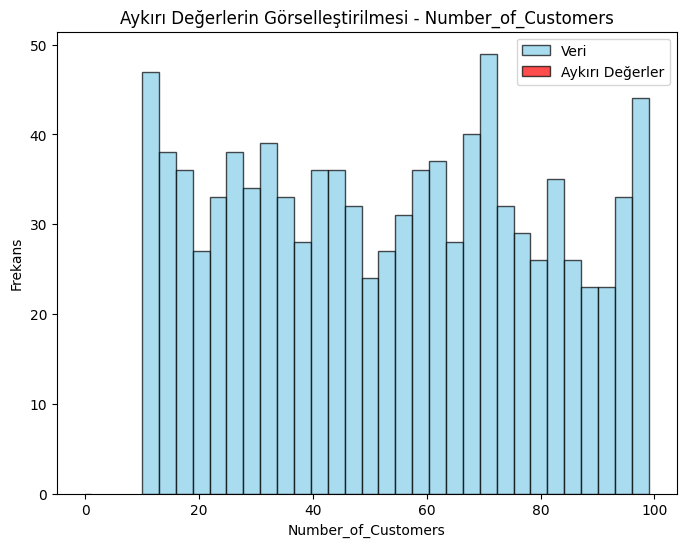

Aykırı Değerler - Menu_Price: 
Series([], Name: Menu_Price, dtype: float64)




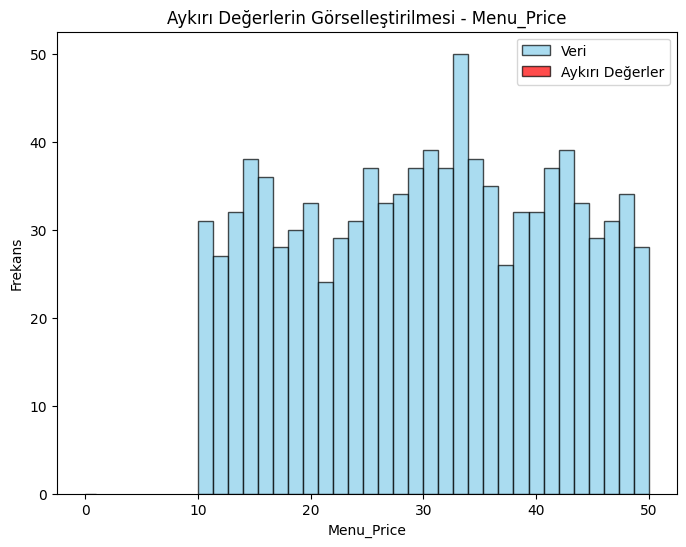

Aykırı Değerler - Marketing_Spend: 
Series([], Name: Marketing_Spend, dtype: float64)




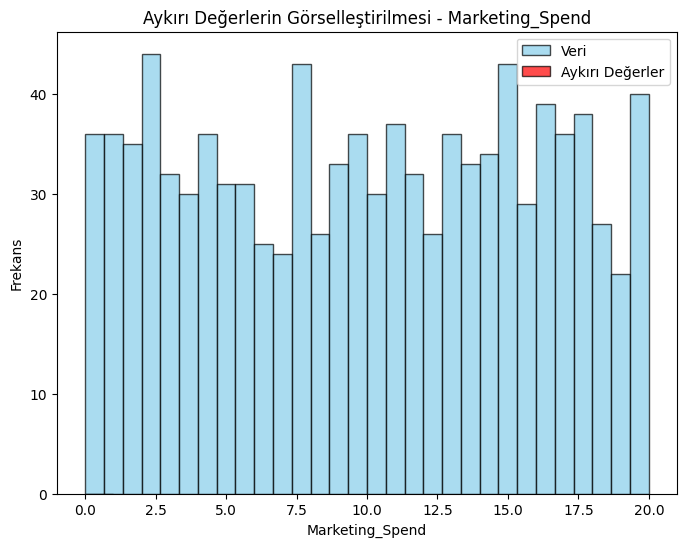

Sayısal olmayan sütun - Cuisine_Type: Aykırı değer hesaplanamaz.

Aykırı Değerler - Average_Customer_Spending: 
Series([], Name: Average_Customer_Spending, dtype: float64)




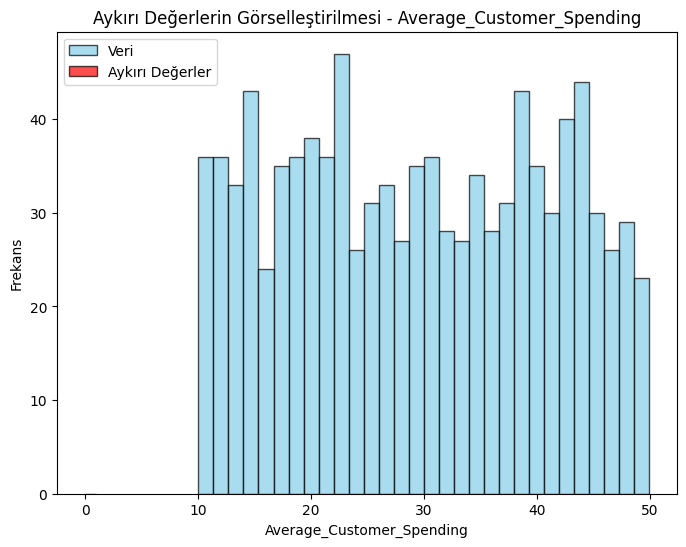

Aykırı Değerler - Promotions: 
Series([], Name: Promotions, dtype: int64)




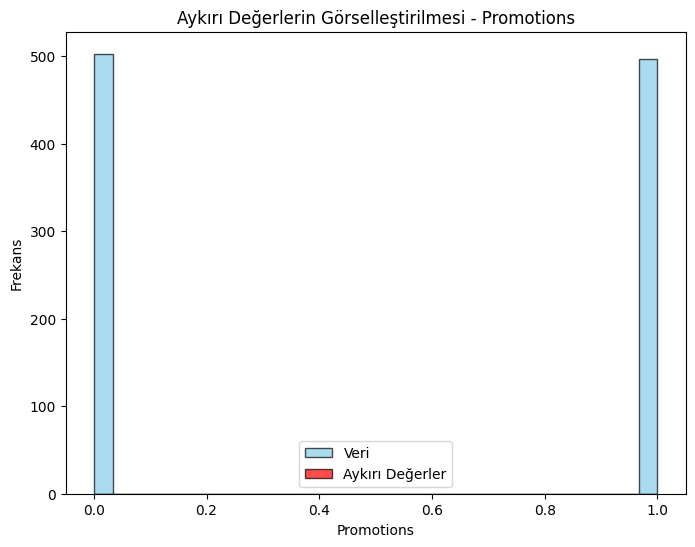

Aykırı Değerler - Reviews: 
Series([], Name: Reviews, dtype: int64)




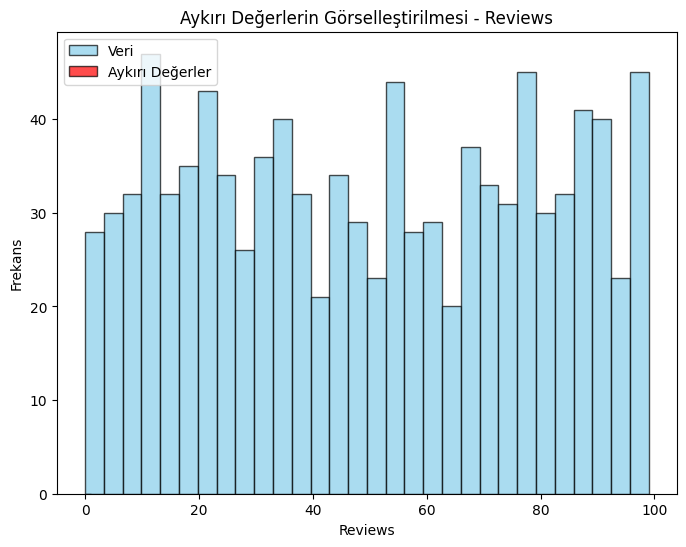

Aykırı Değerler - Monthly_Revenue: 
54     -28.977809
84     563.381332
104    -27.610276
110    -25.453430
605    -28.920890
Name: Monthly_Revenue, dtype: float64




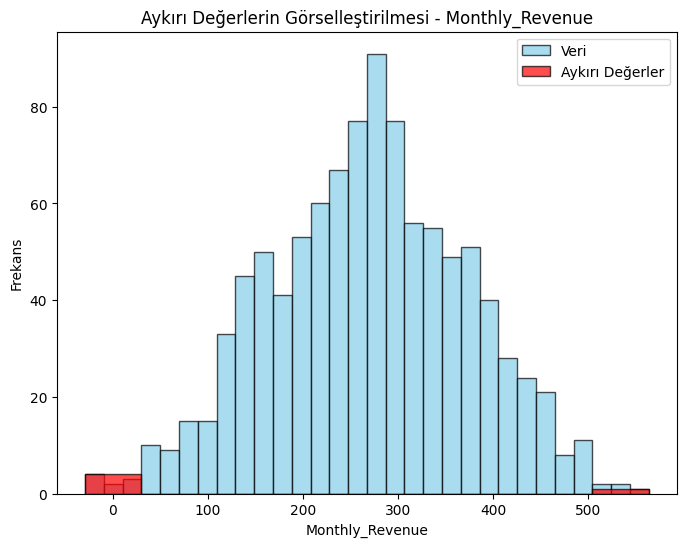

In [31]:
# Her bir sütun için aykırı değerleri bulun
for column in data.columns:
    
    if not pd.api.types.is_numeric_dtype(data[column]):      # Sayısal olmayan sütunları atla
        print("Sayısal olmayan sütun - {}: Aykırı değer hesaplanamaz.\n".format(column))
        continue                                             
    
    # Sütun için çeyreklikleri ve IQR'ı hesaplayın
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Aykırı değerleri tespit edin
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    aykirilar = (data[column] < alt_sinir) | (data[column] > ust_sinir)

    # Aykırı değerleri yazdırın
    print("Aykırı Değerler - {}: ".format(column))
    print(data[column][aykirilar])
    print("\n")

    # Aykırı değerleri görselleştirin
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Veri')
    plt.hist(data[column][aykirilar], bins=10, color='red', edgecolor='black', alpha=0.7, label='Aykırı Değerler')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.title('Aykırı Değerlerin Görselleştirilmesi - {}'.format(column))
    plt.legend()
    plt.show()


#### Sürekli ve Kategorik değişkenlerin temizlenmesi

In [32]:
# Kategorik ve Sayısal Değişkenlerin Belirlenmesi

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [33]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 1000
Variables: 8
cat_cols: 2
num_cols: 6
cat_but_car: 0
num_but_cat: 1


In [34]:
def check_data_types(df):
    data_types = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            data_types[column] = 'numeric'
        else:
            data_types[column] = 'categorical'
    return data_types



# Veri türlerini kontrol etmek için fonksiyonu çağırma
column_data_types = check_data_types(data)
for column, data_type in column_data_types.items():
    print(f"{column}: {data_type}")


Number_of_Customers: numeric
Menu_Price: numeric
Marketing_Spend: numeric
Cuisine_Type: categorical
Average_Customer_Spending: numeric
Promotions: numeric
Reviews: numeric
Monthly_Revenue: numeric


# To Do = gerçekte verilerin numeric mi değil mi olduğunu tartış

### KORELASYON

Text(0.5, 1.0, 'Korelasyon Matrisi')

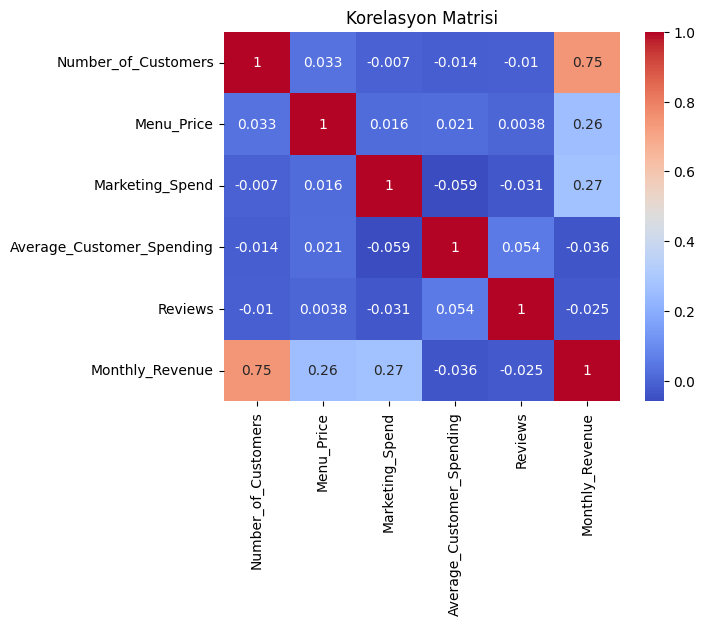

In [36]:
#cat_cols, num_cols, cat_but_car
korelasyon= data[num_cols].corr()
sns.heatmap(korelasyon, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")